# I. les différentes classes

Le programme est constitué de différentes classes qui s'organise suivant le diagramme UML suivant :

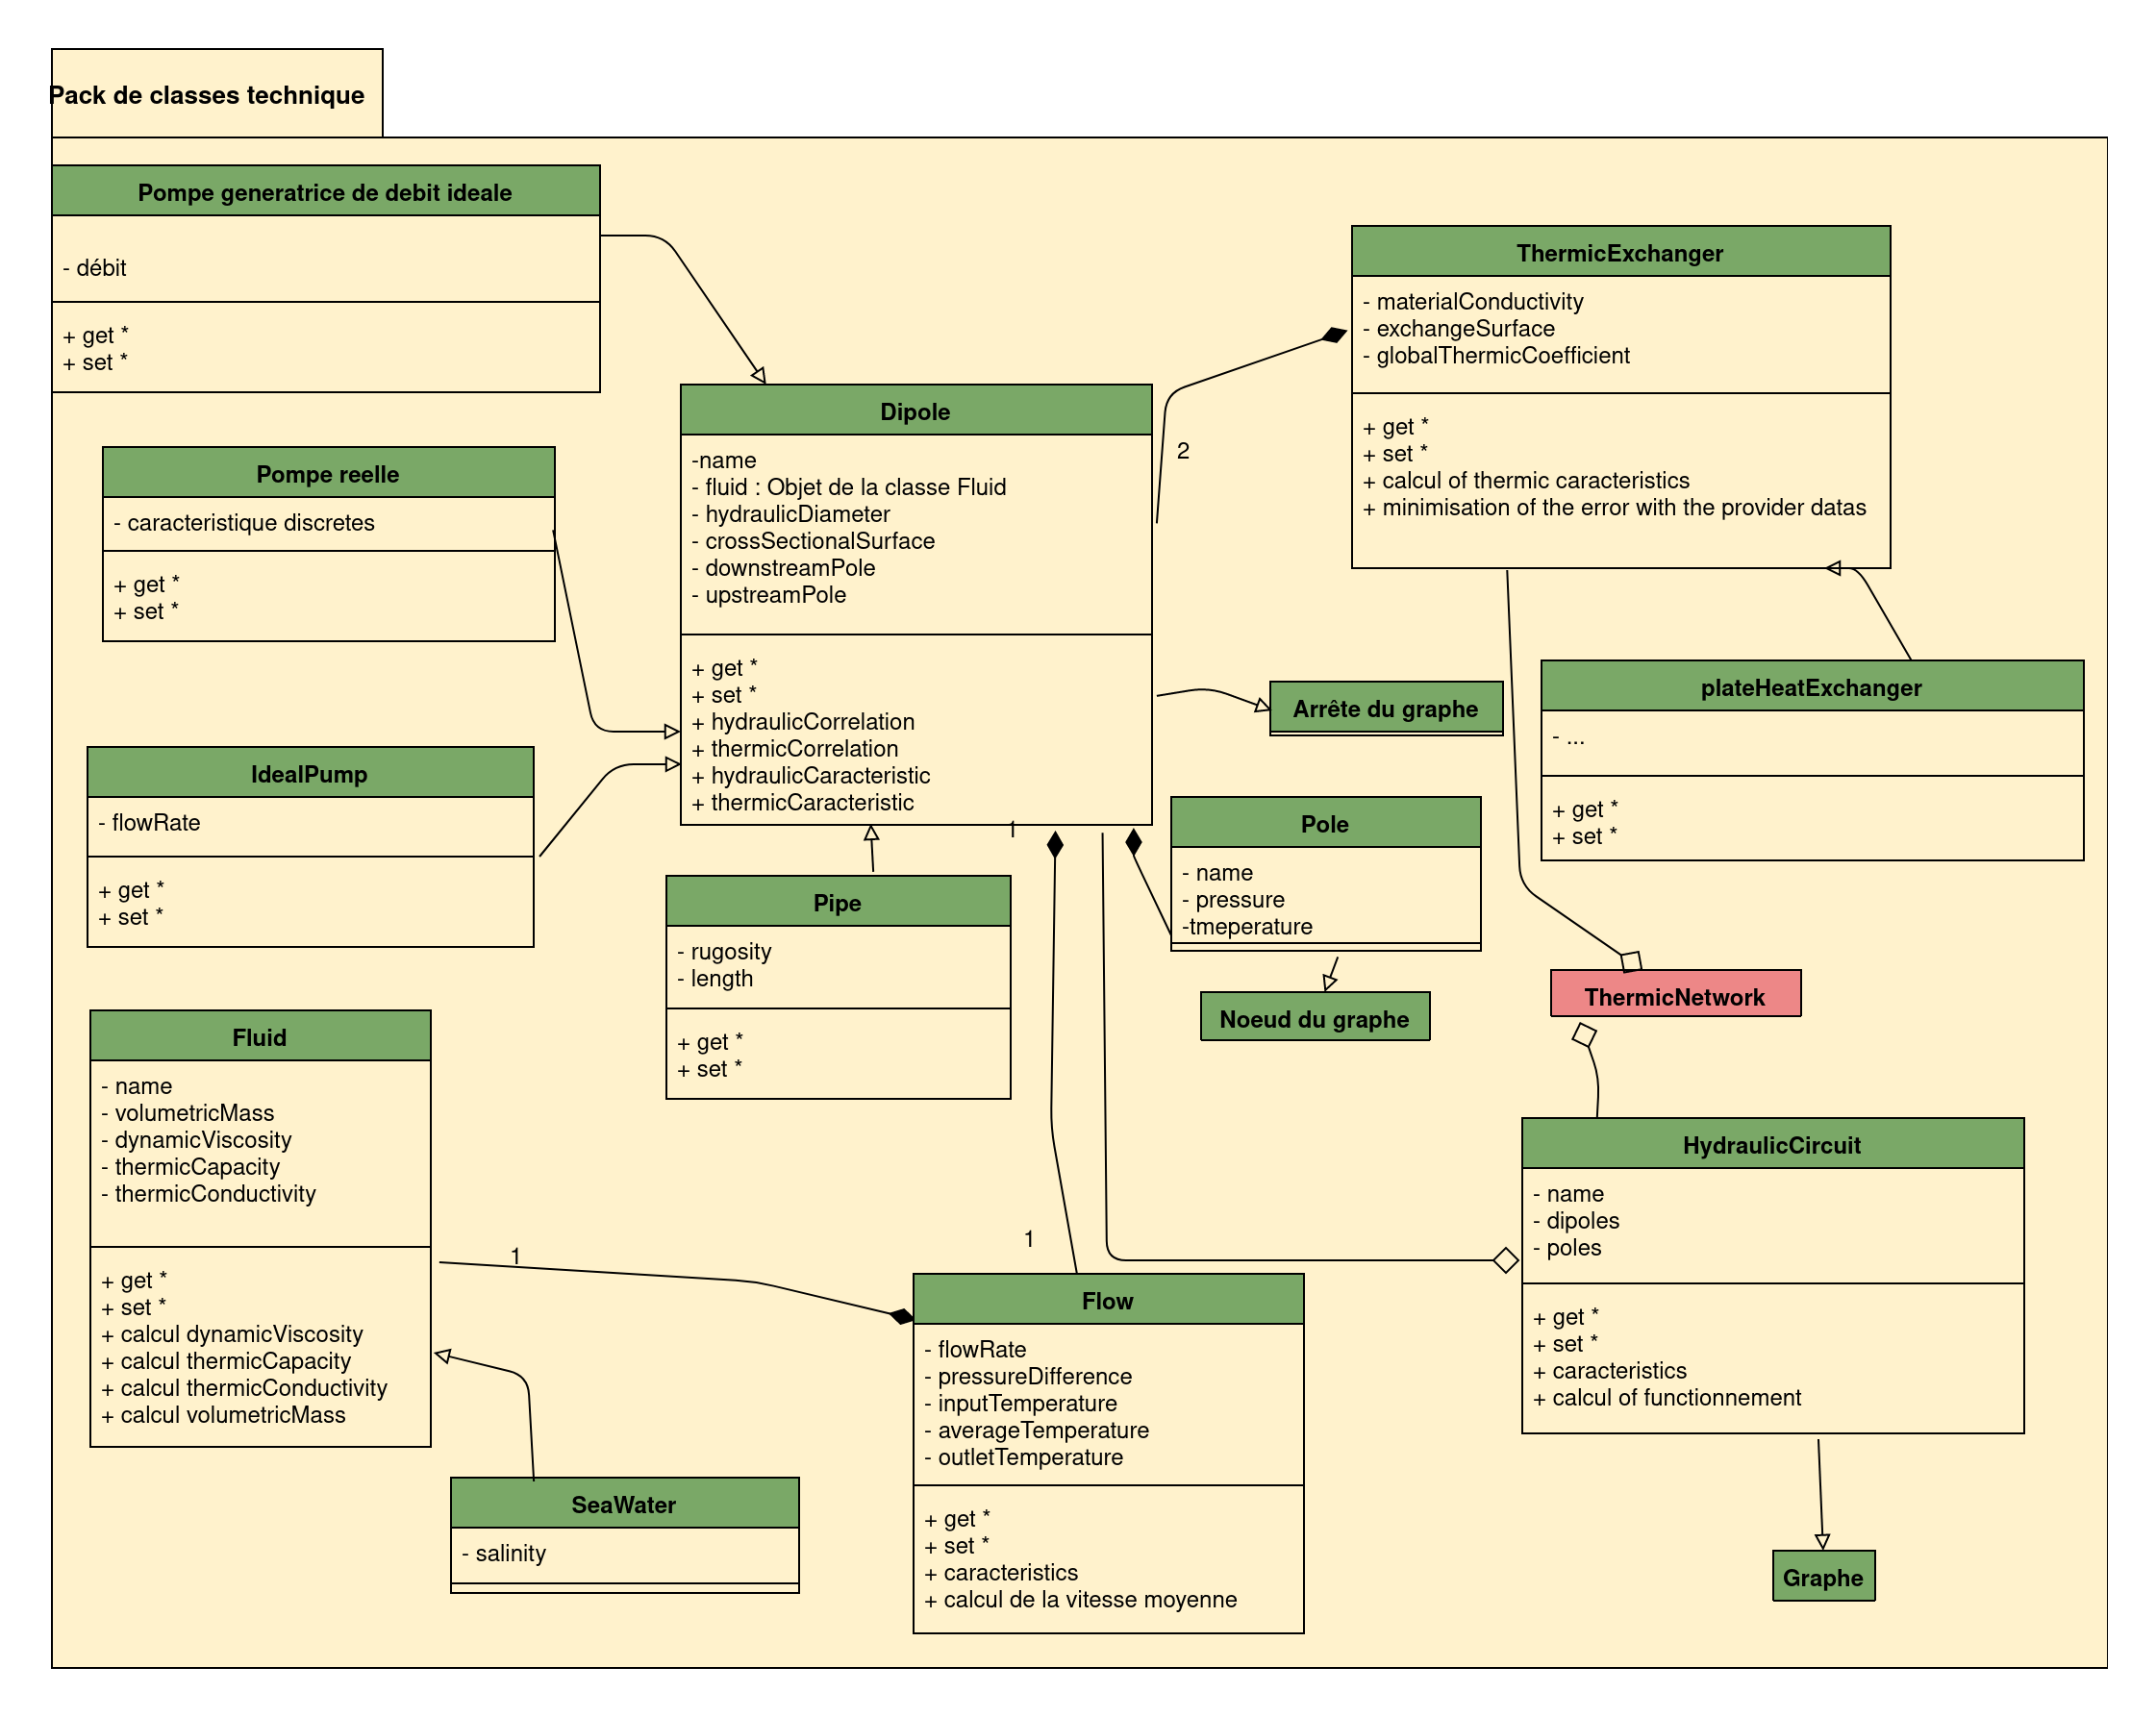

Dans le diagramme précédent, les classes en vertes sont celles qui sont déjà créer et en rouge celles qui devaient être créées mais qui n'ont pas vu le jour faute de temps.


**Attention !** Le code est écrit avec des variables en langue anglaise.
Ne pas hésiter à utiliser la fonction **help**(maFunction) ou **help**(maClasse) pour obtenir 
les informations importantes les concernant


On commence par ajouter à sys.path le module comportant toutes les classes :

In [ ]:
import sys
sys.path.append("./Modules")

## I.1 La classe Fluid

La classe Fluid contient les attributs suivants :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   nom de l'objet	|   **name** 	|   	|  
|   masse volumique	|   **volumetricMass** en $kg/m^3$	|   float	|   
|   capacité thermique	|   **thermicCapacity** en $J/K$	|   float	|   
|   conductivité thermique 	|   **thermicConductivity** en $W/m/K$	|   float	|   
|   salinité (pour la classe **SeaWater**)	|  **salinity** en $ups$ ($g/kg$) 	|   float	|   



Ces caractéristiques sont par défauts égales à celle de l'eau douce à 20°C et à pression atmosphérique. Et la salinité est par défaut égale à 0 lors de la création d'un objet eau de mer.



In [ ]:
#On importe la classe Fluid à partir de laquelle on va créer des instances que l'on utilisera par la suite
from FluidModule import Fluid, SeaWater 
#import module 
#module.fonction()

In [ ]:
# On crée l'objet eau à partir des attributs par défaut de la classe fluid
eau = Fluid()
# On crée un fluide quelconque de la première manière : en explicitant les variables 
fluideQuelconque1 = Fluid(name = 'quelconque1', volumetricMass = 1200.0, thermicCapacity = 3000.0, 
                          thermicConductivity = 0.5)
# On crée un fluide quelconde de la seconde manière : sans expliciter les variables
fluideQuelconque2 = Fluid('quelconque2', 1300.0,2500.0,0.5)
# On crée dun objet eau de mer avec une salinité fixée
eauDeMer = SeaWater(salinity = 10.0)

Pour n'importe quel objet, chacun des attributs peut être lu (avec les méthodes get) et modifier (avec les méthodes set)

In [ ]:
#On accède par exemple au nom des objets créées précédemment
(nameEau, nameQuelconque1, nameQuelconque2, nameEauDeMer) = (eau.name, fluideQuelconque1.name, fluideQuelconque2.name, eauDeMer.name)
#affichage des variables :
print('Les noms des différents fluides créés :')
print(nameEau, nameQuelconque1, nameQuelconque2, nameEauDeMer)

#On modifie les attributs des fluides :
fluideQuelconque1.name = 'changement de nom'
print('\n' + 'nom du fluide quelconque 1 après le changement de nom :')
print(fluideQuelconque1.name)

print(fluideQuelconque1.variables)

Les variables des fluides sont des fonctions des variables d'états : **pression**, **température** et **salinité**. Ainsi, lorsqu'il y a une forte évolution de ces variables (lors d'un échange de chaleur ou de diminutions de pressions dans le circuit par exemple), ces variables doivent pouvoir évoluer. 

Pour ce faire la classe fluid dispose de méthodes capables de calculer les différentes variables à partir de la pression, de la température et de la salinité ces méthodes sont :
- **volumetricMassEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **dynamicViscosityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **thermicCapacityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)
- **thermicConductivityEvolution**(self, temperature, pressure, salinity (pour l'eau de mer), modify = True ou False)

Si le paramètre **modifiy** est vrai cela signifie que l'appel de cette méthode modifiera les attributs correspondants.

Il est important de préciser que ces fonctions ne sont par défaut pas définies, afin de les définir pour un objet donnée, il est possible d'assigner à cette méthode une fonction dépendant des paramètres respectifs : température, pression (et salinité pour l'eau de mer) à l'aide des méthodes :
- **volumetricMassEvolutionDefinition**(self, dependancy)
- **dynamicViscosityEvolutionDefinition**(self, dependancy)
- **thermicCapacityEvolutionDefinition**(self, dependancy)
- **thermicConductivityEvolutionDefinition**(self, dependancy)

où dans chacun des cas dependancy est la fonction souhaitée. Par exemple, la conductivité thermique $k$ peut être approchée par la formule suivante avec une précision de l'ordre de 0.5%: 
$$k = 0.5711\times(1+3 \times 10^{-3}\times T-10.25 \times 10^{-6} T^2 + 6.53\times 10^{-6}p -0.29 \times 10^{-3}S)$$
avec T en degré Celcius, p en dbar et S en g/kg.

Le code suivant permet de mettre en évidence comment ajouter cette relation dans l'objet eau de mer créé précédemment (la pression est donnée en Pascal dans le code pour être cohérent avec le reste du code):




In [ ]:
def thermicConductivity(temperature, pressure, salinity):
    return 0.5711 * (1 + 3 * 10 ** (-3) * temperature - 10.25 * 10 ** (-6) * temperature ** 2 \
                     + 6.53 * 10 ** (-6) * (pressure / 10 ** 4) - 0.29 * 10 **(-3)*salinity)

# Avant la redéfinition de la fonction :
print(eauDeMer.thermicConductivityEvolution(10.0,10 ** 4, 10.0))
#reféfinition de la fonction à l'aide de la corrélation définie précédemment :
eauDeMer.thermicConductivityEvolutionDefinition(thermicConductivity)
#après la redéfinition :
print(eauDeMer.thermicConductivityEvolution(10.0, 10 ** 4, 10.0))
#vérifions que la conductivité thermique de l'eau de mer a bien été modifiée :
print(eauDeMer.thermicConductivity)



## I.2 La classe Dipole
Cette classe permet de définir le dipole dans lequel vient accueillir l'écoulement. Celui-ci peut prendre par exemple la forme de :
- une pompe
- un conduit
- le côtés d'un échangeur de chaleur
- ...

Ses attributs :

 |   	|   variable	|   type python	| 
|---	|---	|---	|
|   le diamètre hydraulique	|   **hydraulicDiameter** en m	|   float	|  
|   la section transversale	|   **sectionalArea** en m²	|   float	|  
|   Les pole amont	|   **downstreamPole** 	|   instance de la classe Pole (décrite plus tard)	|  
|   Les pole aval	|   **upstreamPole**	|   instance de la classe Pole|  
|   l'écoulement au sein du dipole	|   **flow** 	|   instance de la classe Flow (décrite plus tard)	|  
|   les variables qui sont fixées ou non	|   **variables** = [False,False,False, False] (par défaut) 	|   c'est une liste de 4 booléens 	|  
|   l'existence de caracteristiques	|   **caracteristics** = [False,False] (par défaut) 	|   c'est une liste de 1 booléens 	|  
|   appartient à un échangeur thermique ?	|   **exchanger** = False (par défaut) 	|   boolean 	| 



La liste **variables** est telle que :
- le premier élément est égal à True si le débit est variable
- le deuxième élément est égal à True si la différence de pression entre l'entrée et la sortie de l'échangeur est variable
- le troisième élément est égal à True si la température d'entrée est variable
- le troisième élément est égal à False si la température de sortie est variable

La liste **caracteristics** est telle que :
- le premier élément est égal à True si la caractéristique hydraulique est définie
- le deuxième élément est égal à True si la caractéristique thermique est définie

Le **boolean** exchanger est telle que :
- est True si le dipole appartient à une structure d'échangeur False sinon




De plus cette classe admet différentes méthodes qui lui sont spécifiques :
- la corrélation hydraulique : hydraulicCorrelation(self, reynoldsNumber) = $\xi$ tel que $\Delta P = \rho \xi \frac{v^2}{2}$ 
- la corrélation thermique : thermicCorrelation(self, reynoldsNumber, prandtlNumber) = $N_u$ avec $N_u$
 le nombre de Nusselt 
- la caractéristique hydraulique : hydraulicCaracteristic(self, flowRate, fluid) = $\Delta P$ qui correspond à la différence de perte de charge entre l'entrée et la sortie en fonction du débit. La variable fluid n'est autre qu'une instance de la classe Fluid présentée précédemment.
- la caractéristique thermique : thermicCaracteristic(self, flowRate, fluid) = $W_{thermique}$ qui correspond à la puissance thermique que le fluide reçoit.
 
Ces méthodes ne sont pas définies dans la classe Dipole directement, elles peuvent être définies pour un nouveau dipole particulier dont les caractéristiques sont connues. De plus il est possible de créer des classes enfantes de cette classe dipole et de surcharger les méthodes précédentes pour obtenir des caractéristiques bien spécifiques à la classe qui hérite de la classe Dipole. Les classes Pipe et PlateHeatExchanger en sont le parfait exemple.

On importe cette classe et on en crée une instance :
 

In [ ]:
from DipoleModule import Dipole 
dipole = Dipole(hydraulicDiameter= 0.3)
print(dipole.hydraulicDiameter)

 ### I.2.1 La classe enfant Pipe
 
 Cette classe est sensé représenter un conduit, elle a pour attribut particuliers :
 
 |   	|   variable	|   type python	| 
|---	|---	|---	|
|   la rugosité de la paroi	|   **rugosity** en m	|   float	|  
|   longueur du conduit	|   **length** en m	|   float	|  
|   la variables par défauts	|   **[True, True, True, True]**	|   liste de 3 éléments	|   
|   la caractéristiques par défauts:	|   **[True, True]**	|   liste de 3 éléments	|   
|   l'appartenance à un échangeur par défaut	|   **False**	|   liste de 3 éléments	|  

 
 Les méthodes de la classe Dipole sont surchargées et sont telles que la corrélation hydraulique correspond à la corrélation établie par l'équation de Colebrook. A cette corrélation correspond une caractéristique hydraulique. Enfin il serait possible d'établir une caractéristique thermique en considérant que l'ensemble de la perte d'énergie du fluide due aux pertes de charges s'est convertie en chaleur (ceci n'a pas été fait car une telle élévation de température est négligeable dans la plupart des cas mais reste à vérifier). 
 
 La corrélation permet non pas d'obtenir le coefficient de perte de charges $\lambda$ tel que $\Delta P =\rho \lambda \frac{D}{L}\frac{v^2}{2}$ mais un coefficient $\xi = \lambda \frac{D}{L}$ car c'est ce coefficient global qui est caractéristique du dipole et qu'il est judicieux de comparer dans un circuit hydraulique.

In [ ]:
from DipoleModule import Pipe
from math import log10
#créons un conduit d'un diamètre de 30 cm, d'une rugosité de 0.00001 m et d'une longueur de 100 m 
conduit = Pipe(pipeDiameter = 0.3, rugosity = 0.00001, length = 100.0)

#On peut appeler la méthode de calcul de corrélation pour un nombre de Reynolds variable : de 0.1 à 100 000
reynoldsNumbers = [float(5*i) for i in range(200,20000)]
logReynolds = [log10(reynolds) for reynolds in reynoldsNumbers]
N = len(reynoldsNumbers)
coefficientPertesDeChargesDefault = [0 for reynoldsNumber in reynoldsNumbers]
coefficientPertesDeCharges = [0 for reynoldsNumber in reynoldsNumbers]

for i in range(N):
    #Il est possible de calculer ces coefficients avec les valeurs des paramètres par
    #défauts définies dans l'objet en question
    coefficientPertesDeChargesDefault[i] = log10(conduit.hydraulicCorrelation(reynoldsNumbers[i]))
    #Mais il est aussi possible de modifier la valeur des paramètres
    coefficientPertesDeCharges[i] = log10(conduit.hydraulicCorrelation(reynoldsNumbers[i], 
                                                                       length = 50.0, rugosity = 0.001))

#On trace les graphiques ainsi créés :
import matplotlib.pyplot as plt
%matplotlib widget
fig1 = plt.figure()

plt.plot(logReynolds,coefficientPertesDeChargesDefault);
plt.plot(logReynolds,coefficientPertesDeCharges);





In [ ]:
#On  calcul la caractéristique hydraulique en mCE et thermique en kW pour un débit variant 
#de 50 à 500 m³/h 
debits = [float(5 * i)  for i in range(1,100)]
hydraulique_caracteristique = [conduit.hydraulicCaracteristic(debit / 3600) / 10 ** 5 * 9.8 for debit in debits]
thermique_caracteristique = [conduit.thermicCaracteristic(debit / 3600) / 10 * 3 for debit in debits ]
elevation_temperature = [thermique_caracteristique[i] / (conduit.flow.fluid.thermicCapacity \
                              * conduit.flow.fluid.volumetricMass * debits[i] / 3600)\
                         for i in range(len(thermique_caracteristique))]
fig2 = plt.figure()
plt.plot(debits, hydraulique_caracteristique);
plt.title("caractéristique hydraulique")
plt.xlabel("débit en m³/h")
plt.ylabel("pertes de charges en mCE")

fig3 = plt.figure()
plt.plot(debits, elevation_temperature);
plt.title("élévation de la température par friction")
plt.xlabel("débit en m³/h")
plt.ylabel("élévation de la température en °")


### I.2.2 La classe enfant PlateHeatExchangerSide

Cette classe comme son nom l'indique permet de repésenter un des côtés d'un échangeur à plaques. Celle-ci comporte tout les attributs déterminants pour connaître la corrélation hydraulique et la corrélation thermique permettant de déterminer le coefficient de convection, qui permettra par la suite de calculer le coefficient global de perte de charge. 

Pour une présentation exhaustive de la géométrie des échangeurs à plaques nous vous renvoyons vers le fichier :
[comparaison des échangeurs thermiques](./DocumentsJupyter/comparaison_heat_exchanger.pdf) dans la section géométrie prise en compte.

Les attributs spécifiques à cette classe sont donc :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   angle du relief	|   **angle** en degré	|   float	|  
|   longueur de l'échangeur	|   **length** en m	|   float	|  
|   largeur de l'échangeur	|   **width** en m	|   float	|   
|   nombre de passes	|   **Npasse**	|   float	|   
|   facteur de correction hydraulique 	|   **hydraulicCorrectingFactor**	|   float	|   
|   facteur de correction thermique	|  **thermicCorrectingFactor** 	|   float	|   
|   écart entre les plaques	|  **plateGap** en mm	|   float	|   
|   longueur d'onde du relief sur le revêtement	|  **streakWaveLength** en mm	|   float	|   
|   la variables par défauts	|   **[True, True, True, True]**	|   liste de 3 éléments	|
|   la caractéristiques par défaut	|   **[True, False]**	|   liste de 3 éléments	| 
|   l'appartenance à un échangeur thermique 	|   **True**	|   liste de 3 éléments	| 

 
Les facteurs de correction sont des paramètres qui permettent de faire approcher au mieux les données des fabriquants avec les corrélations hydrauliques et thermiques de la classe.

La caractéristique thermique du côtés de l'échangeur ne peut être fixée car celle-ci dépend de l'autre côtés de l'échangeur c'est pourquoi le booléan correspondant est fixé à false.

En ce qui concerne les corrélations, elles sont tirées du livre : [fundamentals of heat exchanger design](./DocumentsJupyter/fundamentals-of-heat-exchanger-design.pdf) à la page 504. Celles-ci peuvent bien évidemment être améliorées avec des documents plus précis de fabriquants et sur les dernières études effectuées sur les échangeurs thermiques à plaques.

Créons un tel objet et calculons sa caractéristique hydraulique et sa corrélation thermique : 





In [ ]:
from DipoleModule import PlateHeatExchangerSide

plateHeatExchangerSide = PlateHeatExchangerSide(width = 0.5, plateGap = 5.0, plateNumber = 300, streakWaveLength = 2.0, angle = 45.0, length = 2.0, Npasse = 2, hydraulicCorrectingFactor = 1.0, thermicCorrectingFactor = 1.0)

reynoldsNumbers = [float(5 * i) for i in range(200,20000)]
logReynolds = [log10(reynolds) for reynolds in reynoldsNumbers]
logCoefficientPertesDeCharges = [log10(plateHeatExchangerSide.hydraulicCorrelation(reynoldsNumber)) for reynoldsNumber in reynoldsNumbers]
# calcul du nombre de prandtl, pour l'eau
# on récupère le fluide créé dans le flow du dipôle (cette remarque sera explicitée plus tard): (ce fluid correspond à l'eau par défaut)
eau = plateHeatExchangerSide.flow.fluid
thermicCapacity = eau.thermicCapacity
thermicConductivity = eau.thermicConductivity
dynamicViscosity = eau.dynamicViscosity

prandtl = thermicCapacity * dynamicViscosity / thermicConductivity
#Le calcul du nombre de prandtl n'est en réalité pas nécessaire car il le calcul par défaut
Nusselt = [plateHeatExchangerSide.thermicCorrelation(reynolds, prandtl) for reynolds in reynoldsNumbers]


fig3 = plt.figure()
plt.plot(logReynolds, logCoefficientPertesDeCharges )
plt.title('corrélation hydraulique')
plt.xlabel('log(reynolds)')
plt.ylabel('log(coefficient de perte de charge)')
fig4 = plt.figure()
plt.plot(logReynolds, Nusselt)
plt.title('corélation thermique')
plt.xlabel('log(reynolds)')
plt.ylabel('Nusselt')
#Enfin on calcule la caractéristique hydraulique et thermique avec de même un débit variant entre 100 et 500 m³/h 
debits = [i/10 for i in range(1000, 5000)]
hydraulique_caracteristique = [plateHeatExchangerSide.hydraulicCaracteristic(flowRate = debit / 3600) \
                   / 10 ** 5 * 9.8 for debit in debits]
fig5 = plt.figure()
plt.plot(debits,hydraulique_caracteristique)
plt.title('caracteristique hydraulique')
plt.xlabel('débit en m³/h')
plt.ylabel('Pression en mCE')


### I.2.3 Les classes enfants : Pump et IdealPump

#### I.2.3.a La classe Ideal Pump

Ces deux classes permettent de créer une pompe. La classe IdealPump permet de créer une pompe dont le débit qu'elle déploie est constant et seul la surpression qu'elle doit générer évolue en fonction du circuit hydraulique et du débit délivrer par la pompe. 

Ce qui change c'est que son initialisation ne requiert plus un objet flow instance de la classe flow mais à la place un débit et une température d'entrée comme représenté dans le tableau suivant :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   le débit de la pompe	|   **flowRate** en m³/s	|   float	|  
|   la température d'entrée 	|   **inputTemperature** en ° C	|   float attribut de l'attribut flow et downstream Pole	|  
|   la puissance thermique données au fluide 	|   **thermicPower** en W	|   float	|  
|   le fluide 	|   **fluid**	|   instance de la classe Fluid	|  
|   les variables sont fixées à 	|   **variables** = [False, True, False (si la temp entrée est donnée), True]	|   list| 
|   les caractéristiques sont fixées à 	|   **variables** = [False, True]	|   list| 
|   l'appartencance à un échangeur est fixé à	|   **exchanger** = False	|   boolean| 

Comme il est possible de le remarquer dans la classe variable, seule la variable différence de pression (ou surpression dans le cas des pompes) est fixée.

In [ ]:
#importation de la classe pompe :
from DipoleModule import IdealPump
#création d'une instance :
idealPump = IdealPump(flowRate = 0.1, inputTemperature = 20.0)


Cette classe aura un rôle a joué pour tout ce qui est du calcul de débit nécessaire ou du calcule de HMT pour un débit donné comme nous le montrerons lorsque la classe HydraulicCircuit sera présentée.


#### I.2.3.b La classe Pump
La classe pompe représente une Pump dont la caractéristique serait connue par un nuage de points définie par deux vecteurs : $\Delta P$ (la surpression induite par la pompe) et $Q$ (le débit induit par la pompe) tels que la caracteristique de la pompe vérifie : $\text{caracteristic}(Q(i)) = \Delta P(i)$

Pour les pompes dont la caractéristique est amenée à évoluer (par une variation de fréquence par exemple), il faudrait surcharger la méthode pour créer une interpolation du nuage de points définie par une matrice de surpression $\Delta P$ tel que :  $\text{caracteristic}(Q(i),\nu(j)) = \Delta P(i,j)$ avec $Q$ un vecteur indiquant le différents débits et $\nu$ un vecteur indiquant les différentes fréquences.

En l'état actuel des choses il est possible de créer une caractéristique qui dépend uniquement du débit : lorsque le nuage de point est donné en initialisation, la classe surcharge automatiquement la fonction caractéristic en interpollant le nuage de point. La classe Pump admet donc en variables d'initalisalisation :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   le vecteur des débits	|   **flowRates** en m³/s	|   list de float	|  
|   le vecteur des supression 	|   **overPressures** en $P_a$	|   list de float	|  
|   la puissance thermique données au fluide 	|   **thermicPower** en W	|   float	|  
|   le fluide 	|   **fluid**	|   instance de la classe Fluid	|  
|   la température d'entée 	|   **inputTemperature** en °C	|   float attribut de l'attribut flow et downstream Pole	|  
|   les variables par défaut	|   **variables** = [True, True, True, False]	|   attribut de la classe Dipole|
|   les caractéristiques sont fixées à	|   **variables** = [True, True]	|   attribut de la classe Dipole|
|   l'appartenance à un échangeur est fixé à	|   **exchanger** = False	|   attribut de la classe Dipole|


En ce qui concerne les méthodes spécifiques de cette classe, elle comporte une méthode qui permet de donner la puissance hydraulique de la pompe en fonction du débit délivré :
- **hydraulicPower**(self, flowRate = None) = puissance hydraulique, si aucun débit n'est donné alors le débit pris en compte est le débit de l'instance de la classe flow interne à la classe pompe

In [ ]:
import numpy as np # on importe le module numpy qui permet de créer facilement des vecteurs avec linspace : np.linspace(0,1,1000) crée un vecteur de 1000 points qui commence à 0 et finit à 1
from DipoleModule import Pump
# on commence par créer un nuage de point qui permettra de constituer la caractéristique :
flowRates = np.linspace(0,1,1000)
overPressures = [(1 - flowRate ** 2) * 10 ** 5 * 3 for flowRate in flowRates]
# on crée l'instance à partir de ce nuage de point :
pump = Pump(flowRates = flowRates, overPressures = overPressures, inputTemperature = 20.0)
#on peut ainsi calculer la surpression pour un débit donnée entre
#le débit minimum et le débit maximum de la liste flowRates :
print('surpression en mCE pour un débit de 0.5 m³/s')
print(pump.hydraulicCaracteristic(flowRate = 0.6) / 10 ** 5 * 9.8)
#on peut aussi calculer la puissance hydraulique correspondante :
print('puissance hydraulique en kW pour un débit de 0.5 m³/s')
print(pump.hydraulicPower(0.5) / 10 ** 3)

### I.2.4 Le diagramme de classe précis représentant le bloc correspondant à la classe Dipole

## I.3 la classe Flow
La classe flow représente l'état de l'écoulement à l'intérieur d'un dipôle lorsque celui-ci est définie ou connue, elle a comme attributs :

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   un débit	|   **flowRate** en m³/s	|   float	|  
|   une différence de pression 	|   **pressureDifference** en $P_a$	|   float	|  
|   une température d'entrée 	|   **inputTemperature** en °C	|   float	|  
|   une température moyenne à l'intérieur du dipôle 	|   **averageTemperature** en °C	|   float	|  
|   une température de sortie 	|   **outletTemperature** en °C	|   float | 
|   une différence de température entre l'entrée et la sortie 	|   **temperatureDifference** 	|   float| 
|   un fluide 	|   **fluid** 	|   instance de la classe Fluid| 

Les variables qui servent d'inconnue pour les futures systèmes hydrauliques, systèmes thermiques et systèmes thermico-hydrauliques sont :
- flowRate
- pressureDifference
- inputTemperature
- outletTemperature

Il faut donc que chaque dipoles offre la possibilité de calculer ces 4 inconnues, ainsi pour chaque dipoles il faudra que la somme des valeur True dans les attributs : variables, caracteristics et exchanger fassent 4.

## I.4 La classe HeatExchanger

Cette classe représente n'importe quelle échange thermique entre 2 écoulements, afin de se familiariser avec le concept d'échangeur thermique, nous vous invitons à consulter ces deux articles de techniques de l'ingénieur :
[remarques générales échangeurs](./DocumentsJupyter/differents_types_echangeurs.pdf) et [dimensionnement thermique d'un échangeur](./DocumentsJupyter/dimensionnement_thermique.pdf).

|   	|   variable	|   type python	| 
|---	|---	|---	|
|   nom 	|   **name**	|   pas défini	|  
|   conductivité thermique du matériau 	|   **materialConductivity** en $W/m/K$	|   float	|  
|   coefficient d'échange thermique global 	|   **globalThermicCoefficient** en W/m²/K	|   float	| 
|   correction du coefficient d'échange thermique 	|   **correctingThermicCoefficient**	|   float	|
|   existence de corrélations pour le coefficient K ? 	|   **correlations**	|   boolean	|
|   surface d'échange	|   **exchangeSurface** en m²	|   float	|  
|   un dipole hydraulique côtés froid 	|   **hydraulicDipoleCold** 	|   instance de Dipole | 
|   un dipole hydraulique côtés chaud 	|   **hydraulicDipoleWarm** 	|   instance de Dipole| 
|   les équations d'état 	|   **stateEquations** 	|   liste de 2 fonctions| 

Les méthodes les plus importantes de la classe sont :
- **stateEquationDefinition**(self, averagePressureCold, averagePressureWarm, modify), cette fonction renvoit une liste de deux fonctions dont les variables sont : les débits des deux côtés, les température d'entrée et de sortie des deux côtés. Lorsque ces fonctions sont nulles, un des états de fonctionnement de l'échangeur est atteint. Les averagePressureCold et averagePressureWarm permettent de calculer l'état du fluide à l'intérieur de l'échangeur, de plus la variable modify est un booléan qui permet à la méthode de modifier l'attribut stateEquations de la classe.
- **resolutionsStateEquations**(self, flowRateCold, flowRateWarm, inputTempertureCold, inputTemperatureWarm, outletTemperatureCold, outletTemperatureWarm, variables, averagePressureCold, averagePressureWarm, modify, stateEquation) : Cette méthode résout les équations d'états de l'échangeur lorsque 4 variables sur 6 sont fixées dans variables. Toute les variables doivent être estimées et seules les variables indiquées comme True dans variables pourront varier afin d'approcher le point de fonctionnement. Si les variables ne données dans l'appelle de la méthode, ce sont les attributs correspondant qui sont donnés. Si moodify = True on écrit le résultat sur les attributs correspondant, si stateEquation = True on recalcule l'équation d'état.
- **thermicTransfertCoeffient** qui calcule le coefficient : globalThermicCoefficient
- **DTLM** : qui calcule la différence de température logarithmique moyenne entre les deux écoulements.

Exemple d'utilisation :



In [ ]:
from HeatExchangerModule import HeatExchanger
#supposons que l'on souhaite calculer les températures de sorties
#et la puissance thermique échangée entre deux écoulements pour un coefficient
#thermique global constant égal à 7000 W/m²/K et une surface d'échange égale à 
echangeur_quelconque = HeatExchanger(exchangeSurface = 1000, globalThermicCoefficient=7000)
#on accède aux échangeurs des deux côtés :
dipoleFroid = echangeur_quelconque.hydraulicDipoleCold
dipoleChaud = echangeur_quelconque.hydraulicDipoleWarm

#On souhaite calculer les températures de sorties pour des débits de 800 m³/h et pour des 
#températures d'entrées de 12 et 21 °C :
flowRateCold = 800/3600
flowRateWarm = 800/3600
inputTemperatureCold = 12
inputTemperatureWarm = 21
#estimation des températures de sorties : on peut les mettre à 15 toutes les deux :
outletTemperatureCold = 15
outletTemperatureWarm = 15
#on fixe les variables que l'on cherche :
variables = [False, False, False, False, True, True]



echangeur_quelconque.resolutionStateEquations(flowRateCold = flowRateCold, flowRateWarm=flowRateWarm, 
                                           inputTemperatureCold=inputTemperatureCold,inputTemperatureWarm = inputTemperatureWarm,
                                             outletTemperatureCold=outletTemperatureCold,
                                             outletTemperatureWarm=outletTemperatureWarm,
                                             variables = variables, modify = True)

temperature_sortie_chaude = dipole.flow.outletTemperature
print("la température de sortie d'eau chaude : " + str(temperature_sortie_chaude))

### I.4.1 Les échangeurs à plaques et la classe PlateHeatExchanger

Cette classe regroupe deux instances de la classe présentée précédemment : PlateHeatExchangerSide. 
Elle regroupe les mêmes attributs que la classe dipole et regroupe aussi les attributs correspondants aux caractéristiques géométriques de la classe PlateHeatExchangerSide. 

A l'aide des points de fonctionnements que pourraient donner un constructeur, il est possible d'approcher l'état d'un échangeur réel avec les méthodes suivantes :
- **thermicErrorMinimization**(self, functionnementsProvider, modify) : cette méthode permet de faire varier le coefficient de correction thermique pour minimiser l'erreur entre le modèle et la réalité. functionnementsProvider correspond ici à la liste de liste : [[flowRateCold, flowRateWarm, inputTemperatureCold, inputTemperatureWarm, outletTemperatureCold, outletTemperatureWarm],
[....],
...]
- **hydraulicErrorMinimization**(self, functionnementsProvider, modify) : cette méthode permet de faire varier le coefficient de correction hydraulique pour minimiser l'erreur entre le modèle et la réalité. functionnementsProvider correspond ici à la liste de liste : [[flowRate, headLoss],...]

Un exemple : d'utilisation pour approcher le modèle avec les échangeurs de Funke, dont les points de fonctionnements sont données dans le devis : 
[devis Funke](./DocumentsJupyter/DevisFunke.pdf)

In [ ]:
from HeatExchangerModule import PlateExchanger
#On commence par créer un échangeur à plaques avec les mêmes caractéristiques géométriques que l'échangeur du fabriquant :
funke_plate_exchanger = PlateExchanger('Funke', materialConductivity=21.9, length = 2.267, width = 0.6, 
                                                    plateNumber=385.0, Npasse = 1, plateThickness=0.6,
                                                    plateGap=3.8, angle = 75.0, streakWaveLength=1.0)
#puis on récupère les données du fabriquant (à la fois thermique et hydraulique):
#[débit en m³/s, pression en Pa]
donnees_hydrauliques = [[0.1095, 0.267 * 10 ** 5],
                          [0.115, 0.299 * 10 ** 5],
                          [0.17, 0.611 * 10 ** 5],
                          [0.219, 0.611 * 10 ** 5]]
donnees_thermiques = [[0.115, 0.1095, 17.0, 27.10, 26.0, 18.0],
                      [0.17388, 0.16514, 19.0, 32.0, 28.0, 23.11],
                      [0.17396, 0.21805, 19.0, 27.3, 24.75, 23.0]]
#on calcule les coefficients thermiques et hydrauliques et les erreurs moyennes qui sont obtenues avec les nouveaux coefficients
#les coefficients sont par défaut assignées à l'échangeur thermique

coefficient_thermique, erreur_thermique = funke_plate_exchanger.hydraulicErrorMinimization(donnees_hydrauliques)
coefficient_hydraulique, erreur_hydraulique = funke_plate_exchanger.thermicErrorMinimization(donnees_thermiques)

print("erreur thermique en °", erreur_thermique)
print("erreur hydraulique en mCE", erreur_hydraulique)

## I.5 La classe HydraulicCircuit 

La classe HydraulicCircuit permet de regrouper tout les dipoles dans un circuit hydraulique afin de calculer
les points de fonctionnements d'un circuit donné, et de calculer en autre les pertes de charges dans un circuit donné.

Afin de créer un circuit hydraulique il faut connecter des dipoles qui sont connectés avec des poles donnés. 


**Attention** : il n'est pas possible de créer deux dipoles connectés aux même poles (le graphe doit rester simple, propriété mathématiques)
Mais il est quand même possible de mettre des dipoles en parallèle et de créer n'importe quel circuit.

Les méthodes principales de cette classe sont :
- **resolutionFonctionnement**(self, flowRateMagnitude = 0.1 ,pressureMagnitude = 100000.0, buildSystem = False): elle permet de calculer toutes le caractéristiques hydrauliques de chacun des dipoles dans un cicuit donné, la flowRateMagnitude permet d'estimer autour de quelle débit en m³/s le circuit doit chercher les points de fonctionnement, il en est de même avec les pressureMagnitude qui correpond aux différences de pression.
- **assignPressure**(self, node, pressure): permet à partir d'un noeud du (ou pole) du circuit donné de sa pression, la pression en tout les autres poles du circuit.

On va essayer de montrer comment fonctionne cette classe avec l'exemple du circuit suivant :
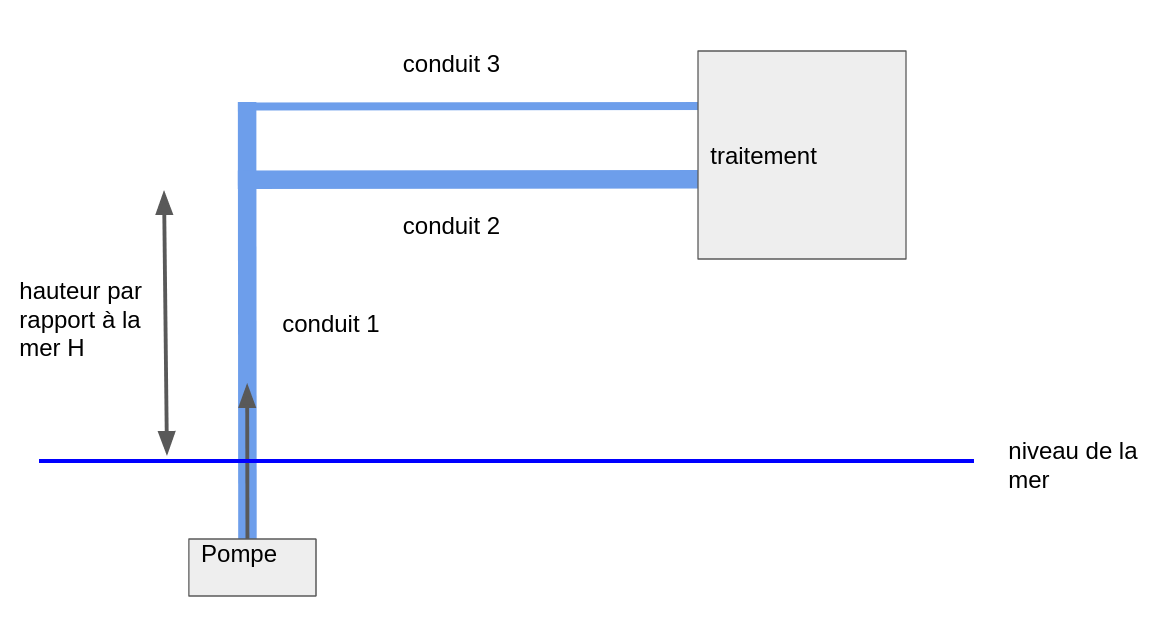

On souhaiterait résoudre les problèmes suivants : quelle HMT faut-il pour amener l'eau vers un traitement lorsque les débits souhaitées en sorties des conduits sont fixées à : 100 m³/h pour le conduit 2 et 50 m³/h pour le conduit conduit 3 et quelles sont les diamètres des conduits nécessaires ?


Comme données du problème on fixe par exemple : le diamètre du conduit 1 à 0.3m, le diamètre du conduit 2 à 0.2m et on souhaite plus particulièrement déterminer le diamètre du conduit 3 pour atteindre le fonctionnement voulu.


On commence par créer une instance de circuit hydraulique correspondant au problème posé :
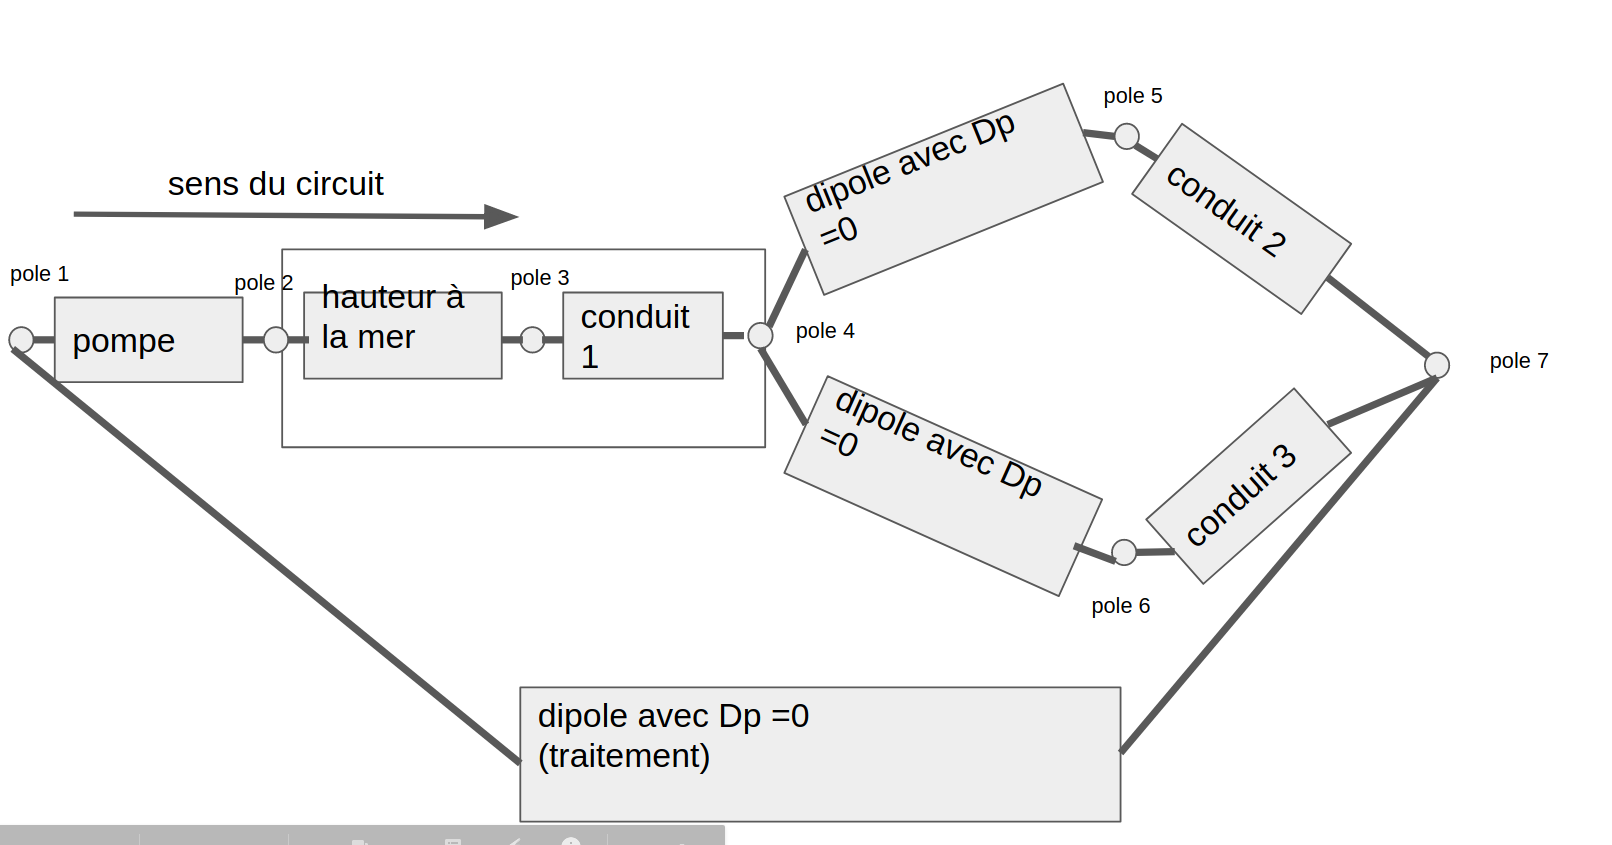

In [ ]:
from DipoleModule import Pole
from HydraulicCircuitModule import HydraulicCircuit
poles = { i : Pole(name = "pole " + str(i)) for i in range(1,8)}
#On commence par créer la pompe, avec un débit totale de 150 m³/h
pompe = IdealPump(name = "Pompe", flowRate = 150 / 3600, downstreamPole = poles[1], upstreamPole = poles[2])
#On crée un dipole hauteur où l'on fixe la différence de pression correspondant à une hauteur de 10m:
h = 10.0
masse_volumique_air = 1.2
g = 9.81
hauteur = Dipole(name = "altitude", variables = [True, False, True, True], downstreamPole = poles[2], 
                 upstreamPole = poles[3])
hauteur.flow.pressureDifference = - (hauteur.flow.fluid.volumetricMass - masse_volumique_air) * g * h
#On crée chacun des conduits, on fera varier le diamètre du conduit 3 plus tard :
conduit_1 = Pipe("conduit 1", pipeDiameter = 0.3, downstreamPole = poles[3], upstreamPole = poles[4] )
conduit_2 = Pipe("conduit 2", pipeDiameter = 0.2, downstreamPole = poles[5], upstreamPole = poles[7] )
conduit_3 = Pipe("conduit 3", pipeDiameter = 0.2, downstreamPole = poles[6], upstreamPole = poles[7] )
#enfin on crée les dipoles avec les différences de pressions fixées à 0 pour conneter les poles restants 
#et fermer le circuit
dipole_01 = Dipole(variables = [True, False, True, True], downstreamPole = poles[4], upstreamPole = poles[5])
dipole_01.flow.pressureDifference = 0.0
dipole_02 = Dipole(variables = [True, False, True, True], downstreamPole = poles[4], upstreamPole = poles[6])
dipole_02.flow.pressureDifference = 0.0
dipole_03 = Dipole(variables = [True, False, True, True], downstreamPole = poles[7], upstreamPole = poles[1])
dipole_03.flow.pressureDifference = 0.0

circuit_hydraulique = HydraulicCircuit(dipoles = [pompe, hauteur, conduit_1, conduit_2, conduit_3, 
                                                  dipole_01, dipole_02, dipole_03])
#print permet de visualiser tout les dipoles et poles du circuit:
circuit_hydraulique.print()


In [ ]:
#calculons le point foncitonnement du circuit pour les caractéristiques précédentes :
#cette partie du code peut durer un certain temps compte tenu du traitement de differents 
#calcul de points de fonctionnement, et que ce traitement ne se fait pas directement à partir
#de l'ordinateur mais du serveur binder.
circuit_hydraulique.resolutionFonctionnement(flowRateMagnitude = 0.2, pressureMagnitude = 100000)

print("HMT de la pompe: ",  pompe.flow.pressureDifference / 10 ** 5 * 9.8)
print("débit dans le conduit 3: ",conduit_3.flow.flowRate * 3600)

#On fait maintenant varier le diamètre du conduit 3 de 1cm à 20 cm:
diametres = np.array([0.01 * i for i in range(1,21)])
debit_conduit_2 = []
debit_conduit_3 = []
HMT = []
for diametre in diametres:
    conduit_3.pipeDiameter = diametre
    circuit_hydraulique.resolutionFonctionnement(flowRateMagnitude = 0.2, pressureMagnitude = 100000, 
                                                 buildSystem = True)
    debit_conduit_2.append(conduit_2.flow.flowRate * 3600)
    debit_conduit_3.append(conduit_3.flow.flowRate * 3600)
    HMT.append(pompe.flow.pressureDifference / 10 ** 5 * 9.8)
fig1 = plt.figure()
graphe_1, = plt.plot(diametres * 100, debit_conduit_2)
graphe_2, = plt.plot(diametres * 100, debit_conduit_3)
plt.legend([graphe_1, graphe_2],["débit conduit 2", "débit conduit 3"])
plt.plot()
plt.title("débits dans les conduits")
fig2 = plt.figure()
plt.plot(diametres * 100, HMT)
plt.title("HMT de la pompe")



On peut évidemment lire sur le graphique montrant les débits, le diamètre pour lequel le débit dans le conduit 3 est égale à 50 m³/h : c'est atteint pour un diamètre de 6.2 cm environ.

En terme de complexité, l'algorithme n'est **pas encore optimisé**, ainsi la complexité est proportionnelle au nombre de dipole au cube ($O(N^3$)), ce qui peut prendre beaucoup de temps de calcul pour un circuit assez complexe. 

Il est relativement facile de réduire ce temps de calcul en regroupant les dipoles qui sont en série et les dipoles qui sont en parallèles. Ce traitement réduirait relativement le temps de calcul en passant d'un temps de calcul en nombre de dipoles au cube en temps de calcul en nombre de série de dipoles au cube. Par  exemple dans le circuit précédent la complexité est proportionnelle à $8^3 = 512$ et en optimisant l'algorithme, elle serait de $3^3 = 9$, plus de 50 fois plus petite ! 

De plus le désavantage dans l'utilisation de l'algorithme précédent c'est qu'il doit refabriquer pour chaque diametre un système avant de le résoudre, il serait donc intéressant de pouvoir modifier le système juste à l'endroit nécessaire (ici en modifiant uniquement le diamètre qui apparaît dans le système). Cette partie est très importante pour une utilisation dynamique où seul les certaines variables fixées changeront au cours du temps (telles que les températures souhaitées...), il doit être possible de recréer rapidement le système pour pouvoir le résoudre rapidement. De plus, pour l'utilisation dynamique comme le point de fonctionnement à l'instant $t+1$ sera très proche du point de fonctionnement à $t$, les variables de départ pour l'algorithme de résolution pourront être les variables de l'instant $t$.



# II Les prochaines améliorations du code et idée de développement.

En ce qui concerne les prochaines améliorations du code, on peut les lister par ordre d'importance avant de rendre le code réellement utilisable pour gérer et organiser de manière méticuleuse un futur projet Swac (ou de réseau de froid). 
- Ajouter une classe qui permet de modéliser les groupes froids.
- Ajouter une classe thermicNetwork qui prendrait en argument tout les circuits hydrauliques qui appartiennent à un même réseau de chaleur (on pense au circuit hydraulique chaud et froid). Cette classe comporterait aussi tout les échangeurs thermiques qui font la liaison entre les différents circuits hydrauliques. L'idéal serait de lui faire une méthode qui, à l'image du circuit hydraulique, prend toute les variables qui sont fixées et calcul, à partir des caractéristiques hydrauliques et thermiques des dipoles ainsi que des fonctionnement des échangeurs, les variables que l'on souhaite connaître. Dans la feuille suivante se trouve toutes les équations : [Equations réseau thermique](./DocumentsJupyter/Equations_circuit_hydraulique.pdf).
- Ajouter des méthodes qui permettent de faire une synthèse de toute l'énergie thermique échangé par le réseau thermique et de toute l'énergie hydraulique dépensée. 
- Ajouter des classes qui permettent de traiter la partie logistique : à savoir les coûts des différents composants, les deadlines, les différents fournisseurs, les notes sur les avantages et inconvénients de chacun d'entre eux... 
- Faire en sorte de pouvoir utiliser assez aisément le code à partir d'un document excel dynamique (recensent par exemple des températures au cours du temps).
- Faire une interface graphique pour qu'un novice puisse utiliser l'outil ttrès facilement.
